#차원과 차원 축소
머신러닝에서는 데이터가 가진 속성을 차원이라고 한다.(과일 사진 10,000개의 특성 = 10,000개의 차원)<br>
다차원 배열에서의 차원은 배열의 축 갯수<br>
1차원 배열에서 차원은 원소의 개수.<br>
2차원 배열에서 차원은 행과 열의 개수<br>
3차원 배열에서 차원은 첫 번째 축, 두 번째 축, 세 번째 축 (x,y,z, 가로길이, 세로길이, 높이)

---
차원 축소는  데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법 (ex) principal component analysis (PCA))<br>
줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이며 복원할 수도 있다.<br>

##주성분 분석(principal components analysis
PCA은 분산이 큰 방향을 찾는 것. (분산: 데이터가 널리 퍼져있는 정도)<br>
주성분 벡터: 원본 데이터에 있는 어떤 방향<br>
주성분의 원소 개수는 특성의 개수와 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.

In [130]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-01-20 18:01:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-01-20 18:01:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-01-20 18:01:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [131]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [133]:
print(pca.components_.shape)

(50, 10000)


In [134]:
import matplotlib.pyplot as plt
def draw_fruits(array, ratio=1):
  n = len(array)
  rows = int(np.ceil(n / 10))
  cols = n if rows == 1 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i,j].imshow(array[i * 10 + j], cmap="gray_r")
      axs[i,j].axis('off')

(50, 10000)


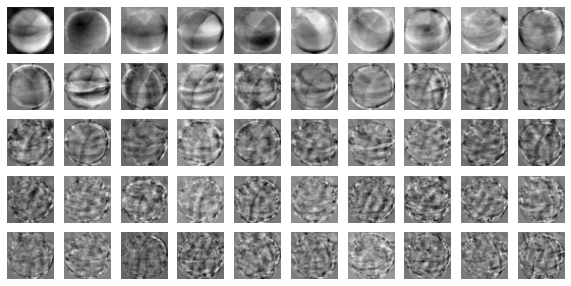

In [135]:
print(pca.components_.shape)
draw_fruits(pca.components_.reshape(-1, 100, 100))

### 데이터 차원 축소

In [136]:
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


###원본 데이터 재구성

In [137]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


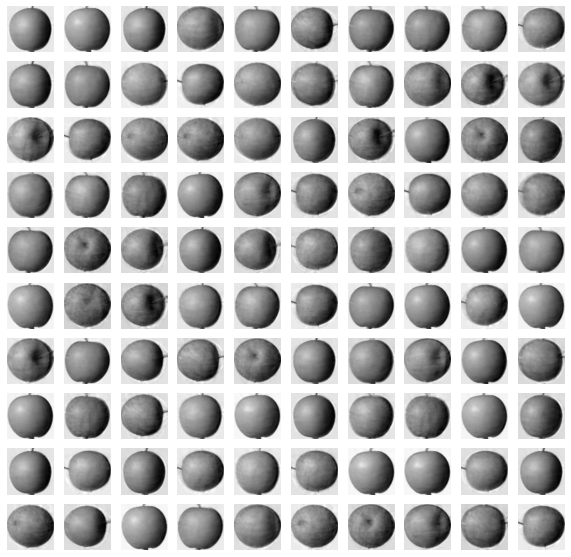

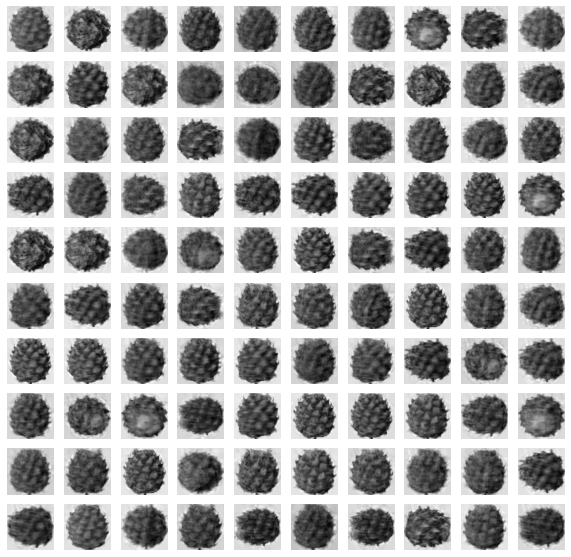

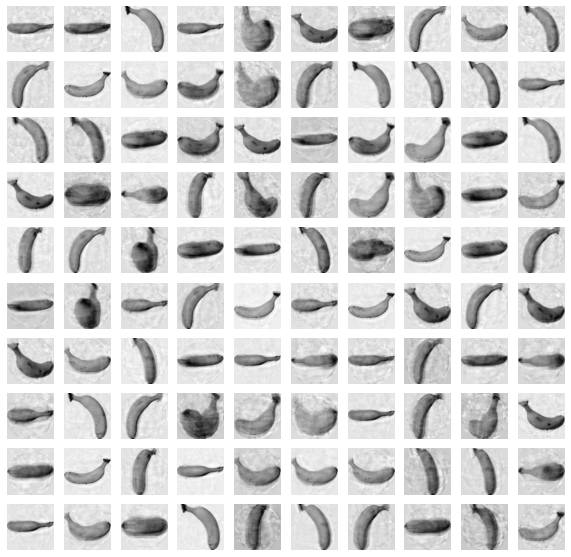

In [138]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

### explained variance
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [139]:
print(np.sum(pca.explained_variance_ratio_))  # 차원이 축소된 값인데 0.92155로 분산을 아주 잘 담아내고 있음

0.9215887568127616


### 각각 주성분이 원본데이터를 얼마나 잘 나타내는지 비교
첫번째 주성분이 가장 잘 나타내고 갈수록 줄어 드는 것이 보임.<br>
이 분석으로 주성분의 개수는 대략 10개정도가 적당한 것으로 확인 할 수 있음.

(50,)


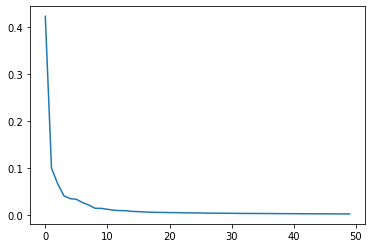

In [140]:
print(pca.explained_variance_ratio_.shape)
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [141]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [142]:
target = np.array([0]*100 + [1]*100 + [2]*100)

### 로지스틱회귀로 성능 체크 
pca로 차원축소 된 데이터가 본래의 데이터보다 훈련 속도 아주 짧음

In [143]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4766401767730712


In [144]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03574070930480957


#### PCA의 n_components 매개변수에는 주성분의 개수 or explained variance 를 입력 할 수 있음

In [145]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

[0.42357017 0.09941755]
(2,)


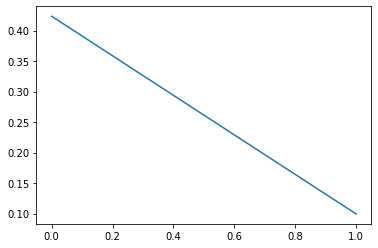

In [146]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.shape)
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [147]:
print(pca.n_components)

0.5


In [148]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [149]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.05168509483337402


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [150]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


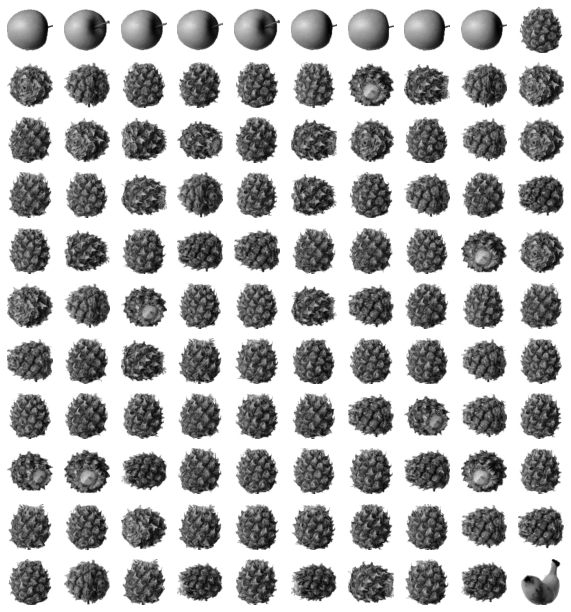

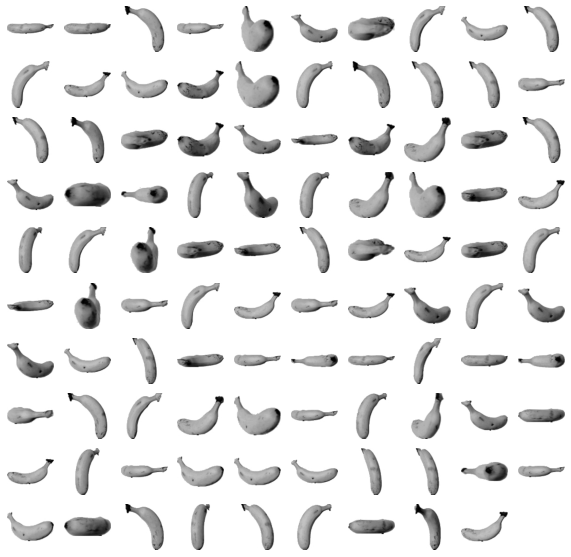

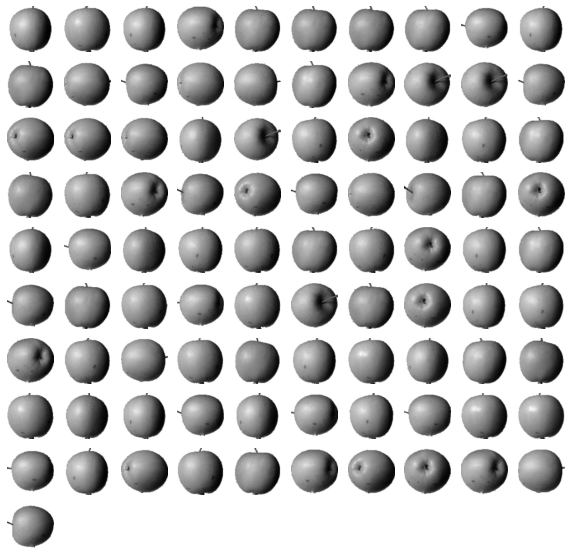

In [151]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

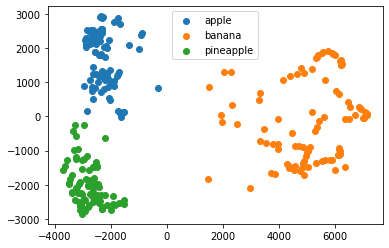

In [152]:
for l in range(0, 3):
  data = fruits_pca[km.labels_ == l]
  plt.scatter(data[:,0], data[0:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

### 주성분 분석은 원본 데이터의 특성를 주성분으로 표현 하는 것
예를 들어 100 * 100 의 픽셀(10,000개의 특성)을 가진 300장의 사진이 있다면 이 사진의 특성을 n_components로 지정한 주성분의 개수로 10,000의 특성을 표현<br>
그 주성분을 지정하는 방법은 분산이 큰 방향을 찾아 지정한다.